<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Movie Lens</p><br>


**Material para revisar:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/
* *Python for Data Analysis* by Wes McKinney
* *Python Data Science Handbook* by Jake VanderPlas

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Importar Librerias
</p>

In [2]:
import pandas as pd

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Análisis de caso: Análisis de datos de películas</p>
<br>Describiremos el conjunto de datos a medida que exploremos con *pandas*. 

## Dataset

Para la clase se ha descargado el archivo ml-small.zip, si desea descargar el completo aquí les dejo el link para que se lo lleven a la casa y hagan sus análisis.

Links de descarga del archivo:
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

Existen 3 archivos CSV files:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres*

In [6]:
movies = pd.read_csv('movielens/movies.csv', sep=',')
print(type(movies))
movies.head()

<class 'pandas.core.frame.DataFrame'>


movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [10]:
def clean_text(txt):
    txt = txt.split()[-1]
    return txt

In [11]:
movies['texto_limpio']=movies['title'].apply(clean_text)

In [12]:
movies

movieId                                              title  \
0           1                                   Toy Story (1995)   
1           2                                     Jumanji (1995)   
2           3                            Grumpier Old Men (1995)   
3           4                           Waiting to Exhale (1995)   
4           5                 Father of the Bride Part II (1995)   
5           6                                        Heat (1995)   
6           7                                     Sabrina (1995)   
7           8                                Tom and Huck (1995)   
8           9                                Sudden Death (1995)   
9          10                                   GoldenEye (1995)   
10         11                     American President, The (1995)   
11         12                 Dracula: Dead and Loving It (1995)   
12         13                                       Balto (1995)   
13         14                                       Nixon (1995)   
14         15                            Cutthroat Island (1995)   
15         16                                      Casino (1995)   
16         17                       Sense and Sensibility (1995)   
17         18                                  Four Rooms (1995)   
18         19              Ace Ventura: When Nature Calls (1995)   
19         20                                 Money Train (1995)   
20         21                                  Get Shorty (1995)   
21         22                                     Copycat (1995)   
22         23                                   Assassins (1995)   
23         24                                      Powder (1995)   
24         25                           Leaving Las Vegas (1995)   
25         26                                     Othello (1995)   
26         27                                Now and Then (1995)   
27         28                                  Persuasion (1995)   
28         29  City of Lost Children, The (Cité des enfants p...   
29         30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...   
...       ...                                                ...   
9712   188189                         Sorry to Bother You (2018)   
9713   188301                        Ant-Man and the Wasp (2018)   
9714   188675                                      Dogman (2018)   
9715   188751                Mamma Mia: Here We Go Again! (2018)   
9716   188797                                         Tag (2018)   
9717   188833              The Man Who Killed Don Quixote (2018)   
9718   189043                                  Boundaries (2018)   
9719   189111                                      Spiral (2018)   
9720   189333               Mission: Impossible - Fallout (2018)   
9721   189381                                    SuperFly (2018)   
9722   189547                                Iron Soldier (2010)   
9723   189713                              BlacKkKlansman (2018)   
9724   190183                           The Darkest Minds (2018)   
9725   190207                                        Tilt (2011)   
9726   190209                 Jeff Ross Roasts the Border (2017)   
9727   190213                                   John From (2015)   
9728   190215                                Liquid Truth (2017)   
9729   190219                                       Bunny (1998)   
9730   190221  Hommage à Zgougou (et salut à Sabine Mamou) (2...   
9731   191005                                     Gintama (2017)   
9732   193565                          Gintama: The Movie (2010)   
9733   193567  anohana: The Flower We Saw That Day - The Movi...   
9734   193571                                Silver Spoon (2014)   
9735   193573            Love Live! The School Idol Movie (2015)   
9736   193579           Jon Stewart Has Left the Building (2015)   
9737   193581          Black Butler: Book of the Atlantic (2017)   
9738   193583                       No Game No Life: Zero (201

In [4]:
# Timestamps (UTC) Enero 1, 1970

tags = pd.read_csv('./movielens/tags.csv', sep=',')
tags.head()

userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200

In [5]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [6]:
# For current analysis, we will remove timestamp (we will come back to it!)

del ratings['timestamp']
del tags['timestamp']

<h1 style="font-size:2em;color:#2467C0">Data Structures </h1>

<h1 style="font-size:1.5em;color:#2467C0">DataFrames </h1>

In [14]:
tags.head()

userId  movieId              tag
0       2    60756            funny
1       2    60756  Highly quotable
2       2    60756     will ferrell
3       2    89774     Boxing story
4       2    89774              MMA

In [15]:
tags.index

RangeIndex(start=0, stop=3683, step=1)

In [16]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [5]:
# Extraer filas 0, 11, 2000 del DataFrame

tags.iloc[ [0,11,2000] ]

userId  movieId       tag   timestamp
0          2    60756     funny  1445714994
11        18      431  gangster  1462138749
2000     474     5450     women  1138039255

<h1 style="font-size:2em;color:#2467C0">Estadisticas</h1>

In [18]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [19]:
ratings.describe()

userId        movieId         rating
count  100836.000000  100836.000000  100836.000000
mean      326.127564   19435.295718       3.501557
std       182.618491   35530.987199       1.042529
min         1.000000       1.000000       0.500000
25%       177.000000    1199.000000       3.000000
50%       325.000000    2991.000000       3.500000
75%       477.000000    8122.000000       4.000000
max       610.000000  193609.000000       5.000000

In [20]:
ratings['rating'].mean()

3.501556983616962

In [21]:
ratings.mean()

userId       326.127564
movieId    19435.295718
rating         3.501557
dtype: float64

In [22]:
ratings['rating'].min()

0.5

In [23]:
ratings['rating'].max()

5.0

In [24]:
ratings['rating'].std()

1.0425292390605359

In [25]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [26]:
ratings.corr()

userId   movieId    rating
userId   1.000000  0.006773 -0.049348
movieId  0.006773  1.000000 -0.004061
rating  -0.049348 -0.004061  1.000000

In [27]:
filter_1 = ratings['rating'] > 5
print(filter_1)
filter_1.any()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
100806    False
100807    False
100808    False
100809    False
100810    False
100811    False
100812    False
100813    False
100814    False
100815    False
100816    False
100817    False
100818    False
100819    False
100820    False
100821    False
100822    False
100823    False
100824    False
100825    False
100826    False
100827    False
100828    False
100829    False
100830    False
100831    False
100832    False
100833    False
100834    False
100835    False
Name: rating, Length: 10

False

In [28]:
filter_2 = ratings['rating'] > 0
filter_2.all()

True

<h1 style="font-size:2em;color:#2467C0">Manejo de datos faltantes</h1>

In [29]:
movies.shape

(9742, 3)

In [30]:
#Hay nulls?

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [31]:
ratings.shape

(100836, 3)

In [32]:
#Hay nulls?

ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [33]:
tags.shape

(3683, 3)

In [34]:
#Hay nulls?

tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [6]:
# Si existen nulls se pueden eliminar con
tags = tags.dropna()

In [7]:
#Hay nulls?

tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [37]:
tags.shape

(3683, 3)

<h1 style="font-size:2em;color:#2467C0">Visualizacion</h1>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023571BAD048>]],
      dtype=object)

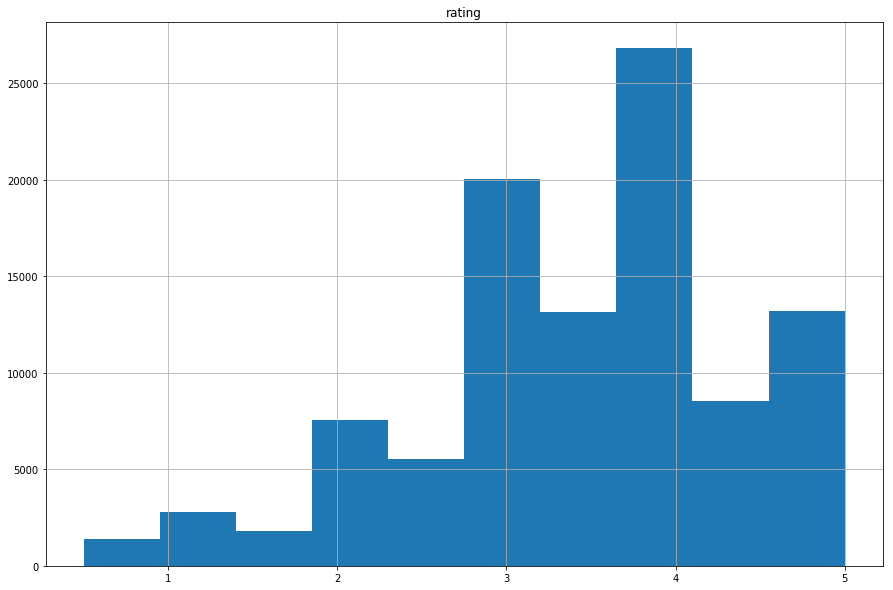

In [38]:
%matplotlib inline

ratings.hist(column='rating', figsize=(15,10))

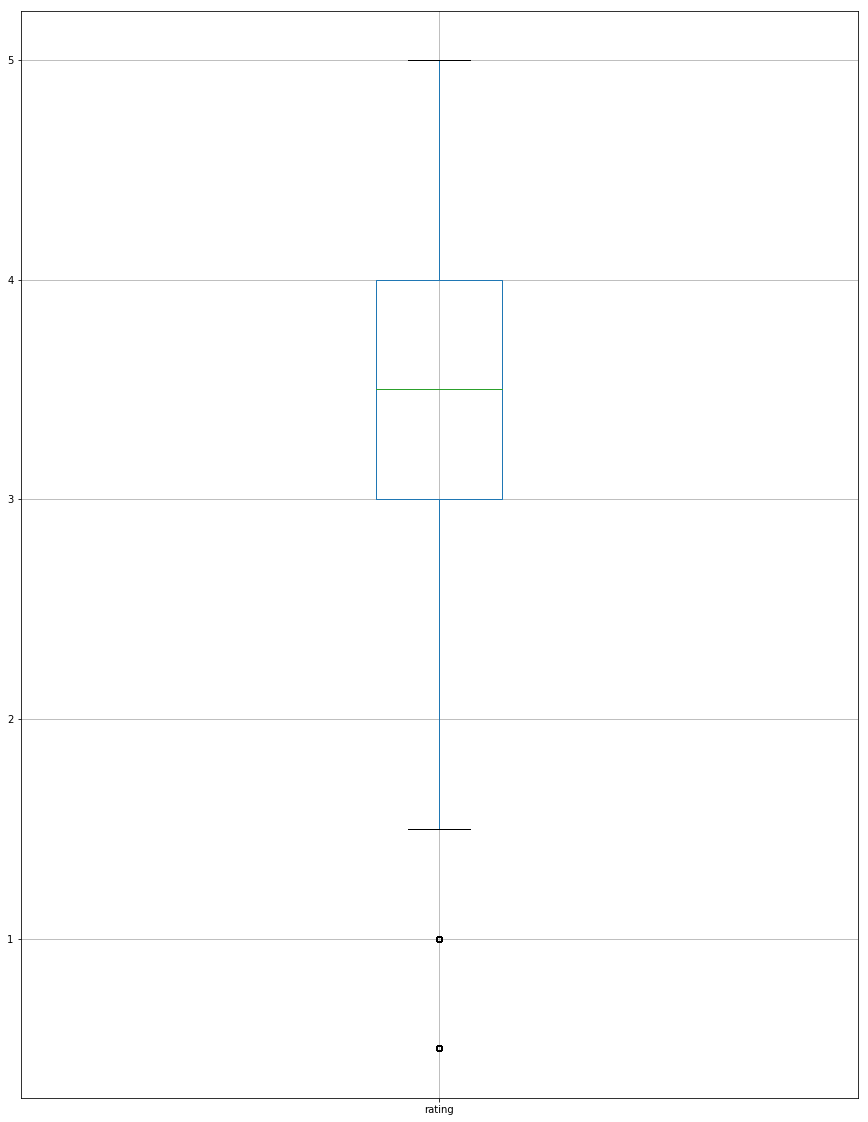

In [39]:
ratings.boxplot(column='rating', figsize=(15,20))

<h1 style="font-size:2em;color:#2467C0">Slicing de columnas</h1>
 

In [40]:
tags['tag'].head()

0              funny
1    Highly quotable
2       will ferrell
3       Boxing story
4                MMA
Name: tag, dtype: object

In [41]:
movies[['title','genres']].head()

title  \
0                    Toy Story (1995)   
1                      Jumanji (1995)   
2             Grumpier Old Men (1995)   
3            Waiting to Exhale (1995)   
4  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [42]:
ratings[-10:]

userId  movieId  rating
100826     610   162350     3.5
100827     610   163937     3.5
100828     610   163981     3.5
100829     610   164179     5.0
100830     610   166528     4.0
100831     610   166534     4.0
100832     610   168248     5.0
100833     610   168250     5.0
100834     610   168252     5.0
100835     610   170875     3.0

In [43]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

families                1
teenage pregnancy       1
coke                    1
Halloween               1
video games             1
daniel craig            1
preacher                1
great cinematography    1
multiple stories        1
DC Comics               1
Name: tag, dtype: int64

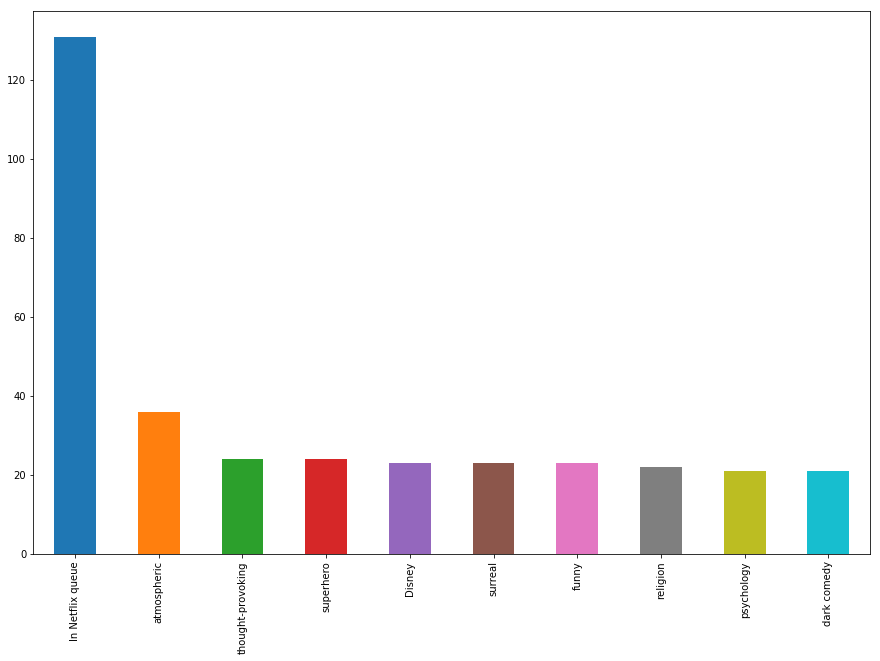

In [44]:
tag_counts[:10].plot(kind='bar', figsize=(15,10))

<h1 style="font-size:2em;color:#2467C0">Filtrar filas especificas</h1>

In [45]:
is_highly_rated = ratings['rating'] >= 4.0

ratings[is_highly_rated][30:50]

userId  movieId  rating
36       1      608     5.0
38       1      661     5.0
40       1      733     4.0
43       1      804     4.0
44       1      919     5.0
45       1      923     5.0
46       1      940     5.0
47       1      943     4.0
48       1      954     5.0
50       1     1023     5.0
51       1     1024     5.0
52       1     1025     5.0
53       1     1029     5.0
55       1     1031     5.0
56       1     1032     5.0
57       1     1042     4.0
58       1     1049     5.0
59       1     1060     4.0
60       1     1073     5.0
61       1     1080     5.0

In [46]:
is_animation = movies['genres'].str.contains('Animation')

movies[is_animation][5:15]

movieId                                   title  \
322      364                   Lion King, The (1994)   
483      551  Nightmare Before Christmas, The (1993)   
488      558                  Pagemaster, The (1994)   
506      588                          Aladdin (1992)   
511      594  Snow White and the Seven Dwarfs (1937)   
512      595             Beauty and the Beast (1991)   
513      596                        Pinocchio (1940)   
522      610                      Heavy Metal (1981)   
527      616                  Aristocats, The (1970)   
534      631          All Dogs Go to Heaven 2 (1996)   

                                                genres  
322    Adventure|Animation|Children|Drama|Musical|IMAX  
483                 Animation|Children|Fantasy|Musical  
488        Action|Adventure|Animation|Children|Fantasy  
506        Adventure|Animation|Children|Comedy|Musical  
511           Animation|Children|Drama|Fantasy|Musical  
512    Animation|Children|Fantasy|Musical|Romance|IMAX  
513                 Animation|Children|Fantasy|Musical  
522           Action|Adventure|Animation|Horror|Sci-Fi  
527                                 Animation|Children  
534  Adventure|Animation|Children|Fantasy|Musical|R...

In [47]:
movies[is_animation].head(15)

movieId                                   title  \
0          1                        Toy Story (1995)   
12        13                            Balto (1995)   
44        48                       Pocahontas (1995)   
205      239                   Goofy Movie, A (1995)   
272      313               Swan Princess, The (1994)   
322      364                   Lion King, The (1994)   
483      551  Nightmare Before Christmas, The (1993)   
488      558                  Pagemaster, The (1994)   
506      588                          Aladdin (1992)   
511      594  Snow White and the Seven Dwarfs (1937)   
512      595             Beauty and the Beast (1991)   
513      596                        Pinocchio (1940)   
522      610                      Heavy Metal (1981)   
527      616                  Aristocats, The (1970)   
534      631          All Dogs Go to Heaven 2 (1996)   

                                                genres  
0          Adventure|Animation|Children|Comedy|Fantasy  
12                        Adventure|Animation|Children  
44            Animation|Children|Drama|Musical|Romance  
205                  Animation|Children|Comedy|Romance  
272                                 Animation|Children  
322    Adventure|Animation|Children|Drama|Musical|IMAX  
483                 Animation|Children|Fantasy|Musical  
488        Action|Adventure|Animation|Children|Fantasy  
506        Adventure|Animation|Children|Comedy|Musical  
511           Animation|Children|Drama|Fantasy|Musical  
512    Animation|Children|Fantasy|Musical|Romance|IMAX  
513                 Animation|Children|Fantasy|Musical  
522           Action|Adventure|Animation|Horror|Sci-Fi  
527                                 Animation|Children  
534  Adventure|Animation|Children|Fantasy|Musical|R...

<h1 style="font-size:2em;color:#2467C0">Group By y agregaciones </h1>

In [48]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

movieId
rating         
0.5        1370
1.0        2811
1.5        1791
2.0        7551
2.5        5550
3.0       20047
3.5       13136
4.0       26818
4.5        8551
5.0       13211

In [49]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

rating
movieId          
1        3.920930
2        3.431818
3        3.259615
4        2.357143
5        3.071429

In [50]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

rating
movieId        
1           215
2           110
3            52
4             7
5            49

In [51]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

rating
movieId        
193581        1
193583        1
193585        1
193587        1
193609        1

<h1 style="font-size:2em;color:#2467C0">Merge Dataframes</h1>

In [52]:
tags.head()

userId  movieId              tag
0       2    60756            funny
1       2    60756  Highly quotable
2       2    60756     will ferrell
3       2    89774     Boxing story
4       2    89774              MMA

In [53]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [54]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        2    Jumanji (1995)                   Adventure|Children|Fantasy   
4        2    Jumanji (1995)                   Adventure|Children|Fantasy   

   userId               tag  
0     336             pixar  
1     474             pixar  
2     567               fun  
3      62           fantasy  
4      62  magic board game

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>


Agregaciones, merging, y filtros para obtener datos</p>

In [55]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

movieId    rating
0        1  3.920930
1        2  3.431818
2        3  3.259615
3        4  2.357143
4        5  3.071429

In [57]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

movieId                                      title  \
9719   193581  Black Butler: Book of the Atlantic (2017)   
9720   193583               No Game No Life: Zero (2017)   
9721   193585                               Flint (2017)   
9722   193587        Bungo Stray Dogs: Dead Apple (2018)   
9723   193609        Andrew Dice Clay: Dice Rules (1991)   

                               genres  rating  
9719  Action|Animation|Comedy|Fantasy     4.0  
9720         Animation|Comedy|Fantasy     3.5  
9721                            Drama     3.5  
9722                 Action|Animation     3.5  
9723                           Comedy     4.0

In [58]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][-5:]

movieId                                      title  \
9713   191005                             Gintama (2017)   
9716   193571                        Silver Spoon (2014)   
9717   193573    Love Live! The School Idol Movie (2015)   
9719   193581  Black Butler: Book of the Atlantic (2017)   
9723   193609        Andrew Dice Clay: Dice Rules (1991)   

                               genres  rating  
9713   Action|Adventure|Comedy|Sci-Fi     4.5  
9716                     Comedy|Drama     4.0  
9717                        Animation     4.0  
9719  Action|Animation|Comedy|Fantasy     4.0  
9723                           Comedy     4.0

In [59]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

movieId                               title  \
0        1                    Toy Story (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
6        7                      Sabrina (1995)   

                                        genres    rating  
0  Adventure|Animation|Children|Comedy|Fantasy  3.920930  
2                               Comedy|Romance  3.259615  
3                         Comedy|Drama|Romance  2.357143  
4                                       Comedy  3.071429  
6                               Comedy|Romance  3.185185

In [60]:
box_office[is_comedy & is_highly_rated][-5:]

movieId                                      title  \
9708   190209         Jeff Ross Roasts the Border (2017)   
9713   191005                             Gintama (2017)   
9716   193571                        Silver Spoon (2014)   
9719   193581  Black Butler: Book of the Atlantic (2017)   
9723   193609        Andrew Dice Clay: Dice Rules (1991)   

                               genres  rating  
9708                           Comedy     4.0  
9713   Action|Adventure|Comedy|Sci-Fi     4.5  
9716                     Comedy|Drama     4.0  
9719  Action|Animation|Comedy|Fantasy     4.0  
9723                           Comedy     4.0

<h1 style="font-size:2em;color:#2467C0">Operacioens vectorizadas de cadenas de texto</h1>


In [61]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Separar (Split) 'genres' en multiples columnas<br> </p>

In [62]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [63]:
movie_genres[:10]

0          1         2       3        4     5     6     7     8  \
0  Adventure  Animation  Children  Comedy  Fantasy  None  None  None  None   
1  Adventure   Children   Fantasy    None     None  None  None  None  None   
2     Comedy    Romance      None    None     None  None  None  None  None   
3     Comedy      Drama   Romance    None     None  None  None  None  None   
4     Comedy       None      None    None     None  None  None  None  None   
5     Action      Crime  Thriller    None     None  None  None  None  None   
6     Comedy    Romance      None    None     None  None  None  None  None   
7  Adventure   Children      None    None     None  None  None  None  None   
8     Action       None      None    None     None  None  None  None  None   
9     Action  Adventure  Thriller    None     None  None  None  None  None   

      9  
0  None  
1  None  
2  None  
3  None  
4  None  
5  None  
6  None  
7  None  
8  None  
9  None

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Generar una columna nueva que cumpla una condición

<br> </p>

In [64]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [65]:
movie_genres[:10]

0          1         2       3        4     5     6     7     8  \
0  Adventure  Animation  Children  Comedy  Fantasy  None  None  None  None   
1  Adventure   Children   Fantasy    None     None  None  None  None  None   
2     Comedy    Romance      None    None     None  None  None  None  None   
3     Comedy      Drama   Romance    None     None  None  None  None  None   
4     Comedy       None      None    None     None  None  None  None  None   
5     Action      Crime  Thriller    None     None  None  None  None  None   
6     Comedy    Romance      None    None     None  None  None  None  None   
7  Adventure   Children      None    None     None  None  None  None  None   
8     Action       None      None    None     None  None  None  None  None   
9     Action  Adventure  Thriller    None     None  None  None  None  None   

      9  isComedy  
0  None      True  
1  None     False  
2  None      True  
3  None      True  
4  None      True  
5  None     False  
6  None      True  
7  None     False  
8  None     False  
9  None     False

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Extraer el año de la pelicula, por ejemplo : (1995)

<br> </p>

In [66]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [67]:
movies.tail()

movieId                                      title  \
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                               genres  year  
9737  Action|Animation|Comedy|Fantasy  2017  
9738         Animation|Comedy|Fantasy  2017  
9739                            Drama  2017  
9740                 Action|Animation  2018  
9741                           Comedy  1991

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Màs información: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods
<br> </p>

<h1 style="font-size:2em;color:#2467C0">Timestamps</h1>

Los Timestamps son muy comunes en data proveniente de sensores

In [68]:
tags = pd.read_csv('./movielens/tags.csv', sep=',')

In [69]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">
 (UTC) Enero 1, 1970
</p>

In [70]:
tags.head(5)

userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200

In [71]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

In [72]:

tags['parsed_time'].dtype

dtype('<M8[ns]')

In [73]:
tags.head(2)

userId  movieId              tag   timestamp         parsed_time
0       2    60756            funny  1445714994 2015-10-24 19:29:54
1       2    60756  Highly quotable  1445714996 2015-10-24 19:29:56

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Filtrar por timestamps</p>

In [74]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

((3683, 5), (1710, 5))

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Reordenar timestamps
</p>

In [75]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

userId  movieId                       tag   timestamp  \
1756     474     3181               Shakespeare  1137179352   
2212     474     6912  Rita Hayworth can dance!  1137179371   
1636     474     2494                   Hungary  1137179426   
1635     474     2494                 Holocaust  1137179426   
1497     474     1836         No DVD at Netflix  1137179444   
1961     474     4969          In Netflix queue  1137179563   
2409     474    26242          In Netflix queue  1137179570   
2413     474    27741          In Netflix queue  1137179587   
2231     474     7025          In Netflix queue  1137179593   
2485     474    41997          In Netflix queue  1137179603   

             parsed_time  
1756 2006-01-13 19:09:12  
2212 2006-01-13 19:09:31  
1636 2006-01-13 19:10:26  
1635 2006-01-13 19:10:26  
1497 2006-01-13 19:10:44  
1961 2006-01-13 19:12:43  
2409 2006-01-13 19:12:50  
2413 2006-01-13 19:13:07  
2231 2006-01-13 19:13:13  
2485 2006-01-13 19:13:23

<h1 style="font-size:2em;color:#2467C0">Rating Promedio de las peliculas sobre el tiempo</h1>
## Existe relaciòn alguna del rating respecto al año de lanzamiento?

In [76]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

movieId  rating
9719   193581     4.0
9720   193583     3.5
9721   193585     3.5
9722   193587     3.5
9723   193609     4.0

In [77]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()
joined.corr()

movieId    rating
movieId  1.000000  0.027841
rating   0.027841  1.000000

In [78]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

year    rating
0  1902  3.500000
1  1903  2.500000
2  1908  4.000000
3  1915  2.000000
4  1916  3.562500
5  1917  4.500000
6  1919  2.000000
7  1920  3.678571
8  1921  4.100000
9  1922  3.531250

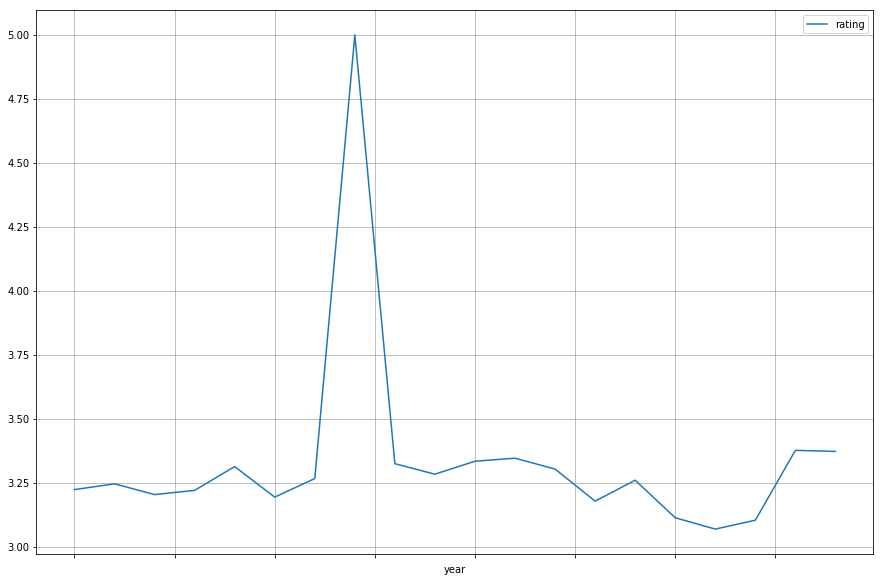

In [79]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)

# TALLER movielens 100k

URL : https://grouplens.org/datasets/movielens/100k/

In [1]:
import pandas as pd
import numpy as np

In [10]:
# Miren que los archivos no son .csv, pero se pueden leer como uno.. Haganlo !. busquen en internet o Prueba y error hasta lograrlo

In [12]:
#tienen que unir los datos. merge,concat de acuerdo a los id uds pueden !

## ¿Cuáles son las 25 películas más votadas?

## ¿Qué películas son las más valoradas?

## ¿Qué películas son las más controvertidas entre las diferentes edades?
TIP : Creen una columna de grupos de edades :  ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

TIP 2 : Funciones groupby y  unstack

## Graficar una BarPlot de la Popularidad de los géneros. Usemos Plotly

## ¿En qué películas están más en desacuerdo los hombres y las mujeres?

TIP : Usen Pivot 